# Random Forest, Naive Bayes, Logistic Regression, and Gradient Boosting

In [ ]:
import pandas as pd
import numpy as np

from nltk import edit_distance
from unidecode import unidecode

from sklearn.metrics import make_scorer, accuracy_score, precision_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier

### Importing and splitting dataset

In [2]:
df = pd.read_pickle('merged_df.pkl.gz', compression='gzip')
df.head()

,name_length,avg_token_length,num_tokens,period_freq,dash_freq,apostrophe_freq,space_freq,bigrams_cosine_sim,accent_count,num_alphabets,...,arab_rom_unigrams_cosine_sim,eng_unigrams_cosine_sim,french_unigrams_cosine_sim,german_unigrams_cosine_sim,ital_unigrams_cosine_sim,portug_unigrams_cosine_sim,span_unigrams_cosine_sim,parentheses_freq,quotation_freq,language
0,9,9.0,1,0,0,0,0,0.250640,0,1,...,0.558548,0.521782,0.549821,0.498951,0.585279,0.572371,0.537863,0,0,Indonesian
1,12,12.0,1,0,0,0,0,0.353292,0,1,...,0.537752,0.604509,0.571680,0.611077,0.667908,0.554799,0.545731,0,0,Indonesian
2,8,8.0,1,0,0,0,0,0.197139,0,1,...,0.623316,0.696796,0.729475,0.664509,0.718184,0.775375,0.744647,0,0,Indonesian
3,9,9.0,1,0,0,0,0,0.155386,0,1,...,0.508871,0.466730,0.458651,0.465674,0.401518,0.419256,0.436786,0,0,Indonesian
4,8,8.0,1,0,0,0,0,0.176917,0,1,...,0.328312,0.599574,0.616171,0.588177,0.651231,0.644292,0.594403,0,0,Indonesian


In [3]:
df.drop(columns = 'bigrams_cosine_sim', inplace = True)
df.columns

Index(['name_length', 'avg_token_length', 'num_tokens', 'period_freq',
       'dash_freq', 'apostrophe_freq', 'space_freq', 'accent_count',
       'num_alphabets', 'edit_distance', 'indo_unigrams_cosine_sim',
       'malay_unigrams_cosine_sim', 'viet_unigrams_cosine_sim',
       'chinese_unigrams_cosine_sim', 'turk_unigrams_cosine_sim',
       'korean_unigrams_cosine_sim', 'japan_unigrams_cosine_sim',
       'arab_rom_unigrams_cosine_sim', 'eng_unigrams_cosine_sim',
       'french_unigrams_cosine_sim', 'german_unigrams_cosine_sim',
       'ital_unigrams_cosine_sim', 'portug_unigrams_cosine_sim',
       'span_unigrams_cosine_sim', 'parentheses_freq', 'quotation_freq',
       'language'],
      dtype='object')

In [4]:
X = df.drop(columns = 'language', axis = 1)
y = df['language']

In [5]:
len(y.unique())

17

In [8]:
# Split data for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2318, stratify = y)

# Creating the model
rf_model = RandomForestClassifier()

# Hyperparameter tuning
param_dist = {
    'n_estimators': np.arange(50, 300, 50), # replaced [50, 100, 200, 300]
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 7, 10, 12, 15],
    'min_samples_leaf': [1, 2, 4, 7, 10],
    'bootstrap': [True, False]
}

In [9]:
y_train.value_counts(normalize = True)

language
Japanese (Characters)    0.324016
Japanese (Romanized)     0.316251
English                  0.077764
Turkish                  0.061581
Indonesian               0.038346
Chinese (Characters)     0.035800
Chinese (Romanized)      0.035775
Korean (Romanized)       0.033459
Korean (Characters)      0.031790
Malay                    0.009916
Spanish                  0.008540
Vietnamese               0.007813
Italian                  0.004121
French                   0.003975
Portuguese               0.003648
German                   0.003634
Arabic (Romanized)       0.003570
Name: proportion, dtype: float64

In [10]:
y_test.value_counts(normalize = True)

language
Japanese (Characters)    0.324024
Japanese (Romanized)     0.316251
English                  0.077763
Turkish                  0.061580
Indonesian               0.038341
Chinese (Characters)     0.035803
Chinese (Romanized)      0.035769
Korean (Romanized)       0.033459
Korean (Characters)      0.031786
Malay                    0.009924
Spanish                  0.008547
Vietnamese               0.007818
Italian                  0.004120
French                   0.003972
Portuguese               0.003642
German                   0.003630
Arabic (Romanized)       0.003573
Name: proportion, dtype: float64

In [11]:
print(len(y_train))
len(y_test)

205030


87870

### Random Forest: RandomizedSearchCV


In [13]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions = param_dist, n_iter = 20, cv = 3, random_state = 2318, scoring = make_scorer(precision_score, average = 'weighted', zero_division = 0))

# Fit the model on the training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 12, 14, 16, 18,
                                                      20],
                                        'min_samples_leaf': [1, 2, 4, 7, 10],
                                        'min_samples_split': [2, 5, 7, 10, 12,
                                                              15],
                                        'n_estimators': array([ 50, 100, 150, 200, 250])},
                   random_state=2318,
                   scoring=make_scorer(precision_score, average=weighted, zero_division=0))

In [14]:
results = random_search.cv_results_
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_depth', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

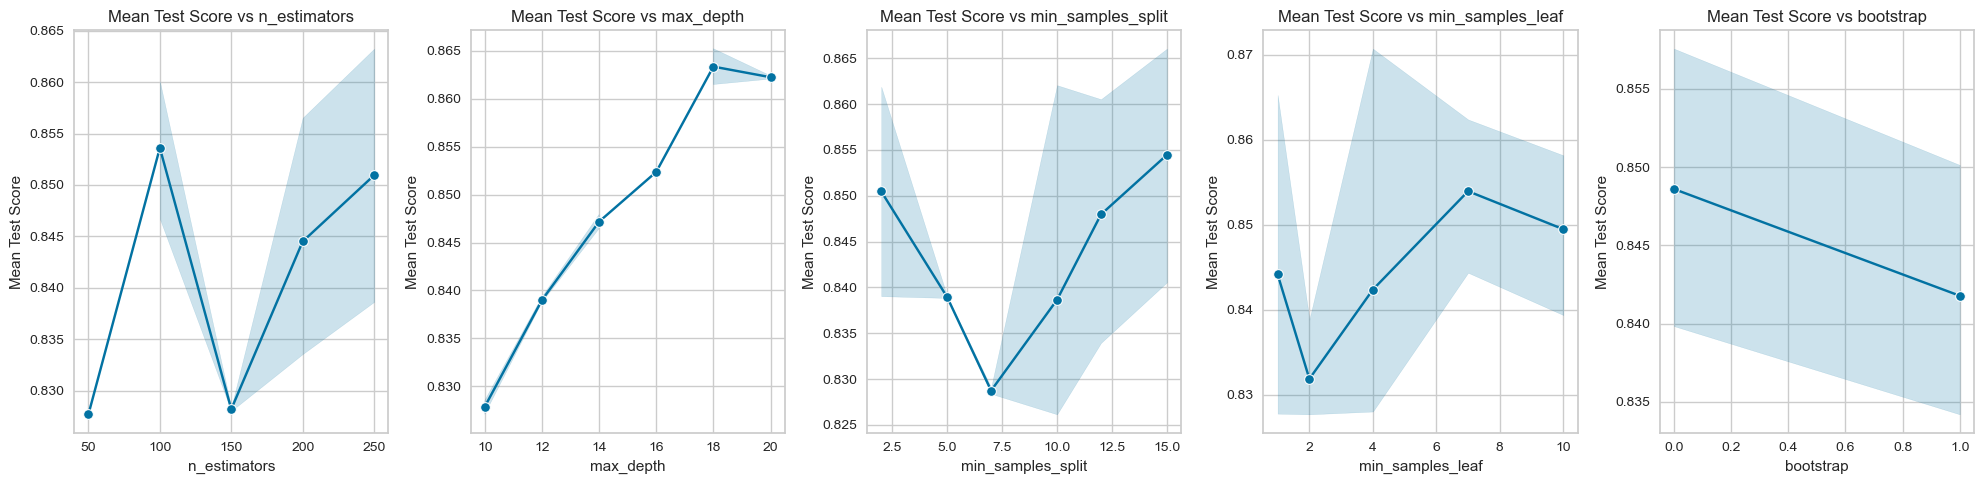

In [15]:
# Plotting all
fig, axes = plt.subplots(1, 5, figsize = (20, 5))

# Plot hyperparameter vs mean test score
for i, (param, values) in enumerate(param_dist.items()):
    x = np.array(results[f'param_{param}'].data, dtype = float)
    y = results['mean_test_score']
    sns.lineplot(x = x, y = y, ax = axes[i], marker = 'o')
    axes[i].set_title(f'Mean Test Score vs {param}')
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

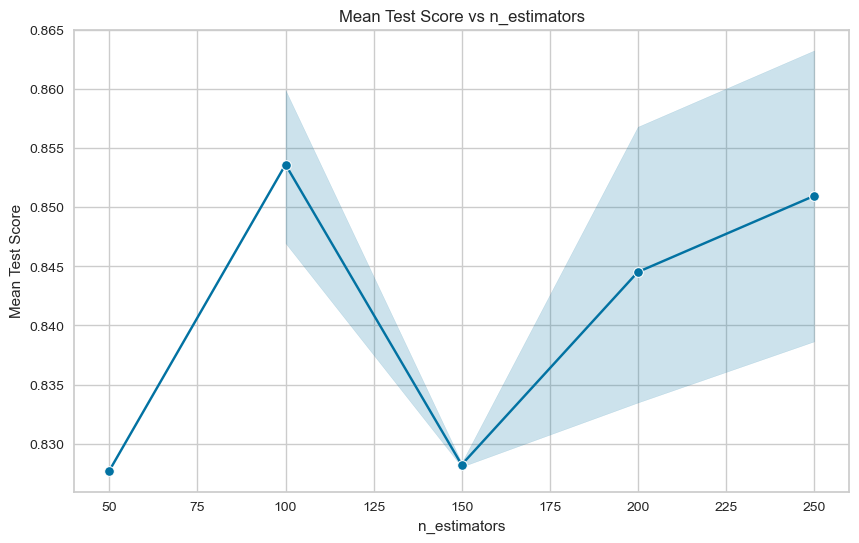

In [69]:
# Plot n_estimators vs mean test score
plt.figure(figsize = (10, 6))
sns.lineplot(x = results['param_n_estimators'], y = results['mean_test_score'], marker = 'o')
plt.title('Mean Test Score vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.show()

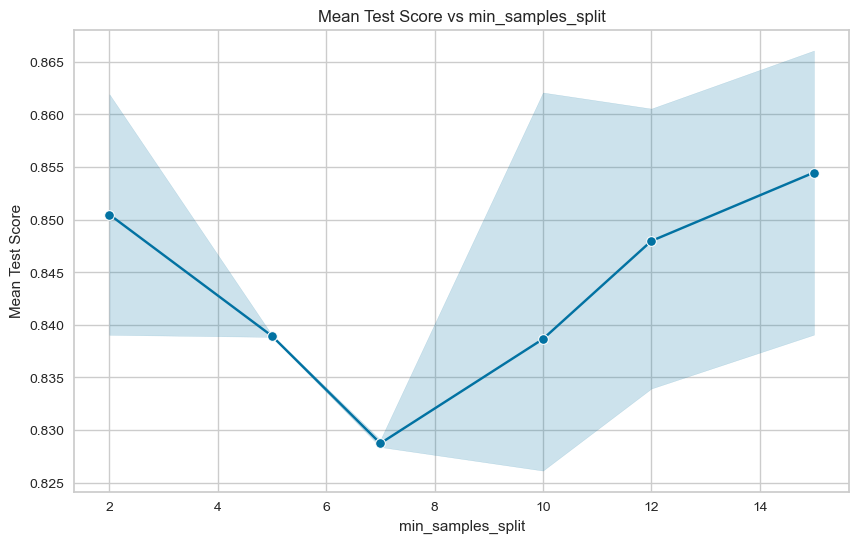

In [17]:
# Plot n_estimators vs mean test score
plt.figure(figsize = (10, 6))
sns.lineplot(x = results['param_min_samples_split'], y = results['mean_test_score'], marker = 'o')
plt.title('Mean Test Score vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Test Score')
plt.show()

/var/folders/gl/9r15n5c95wb28j_6336yjr180000gn/T/ipykernel_50466/2254041540.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = results['param_max_depth'], y = results['mean_test_score'], marker = 'o', ci = None)


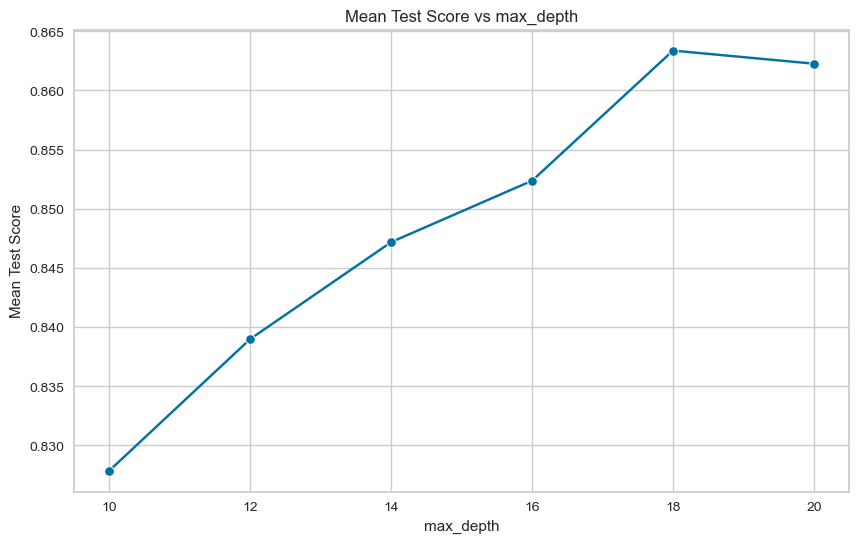

In [77]:
# Plot n_estimators vs mean test score
plt.figure(figsize = (10, 6))
sns.lineplot(x = results['param_max_depth'], y = results['mean_test_score'], marker = 'o', ci = None)
plt.title('Mean Test Score vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.show()

In [ ]:
# # as a bar chart
# plt.figure(figsize = (10, 6))
# # color_palette = sns.color_palette('', n_colors = len(rf_results['mean_test_score']))
# palette = sns.color_palette('coolwarm', len(rf_results['mean_test_score']))
# # rank = rf_results['mean_test_score'].argsort()
# # print(rf_results['mean_test_score'])
# # print(rank)
# # rank = sorted(rf_results['mean_test_score'])
# sns.barplot(x = rf_results['param_n_estimators'], y = rf_results['mean_test_score'], palette = palette)
# plt.title('Mean Test Score vs n_estimators')
# plt.xlabel('n_estimators')
# plt.ylabel('Mean Test Score')
# plt.show()

In [18]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_leaf=4,
                       min_samples_split=15, n_estimators=200)

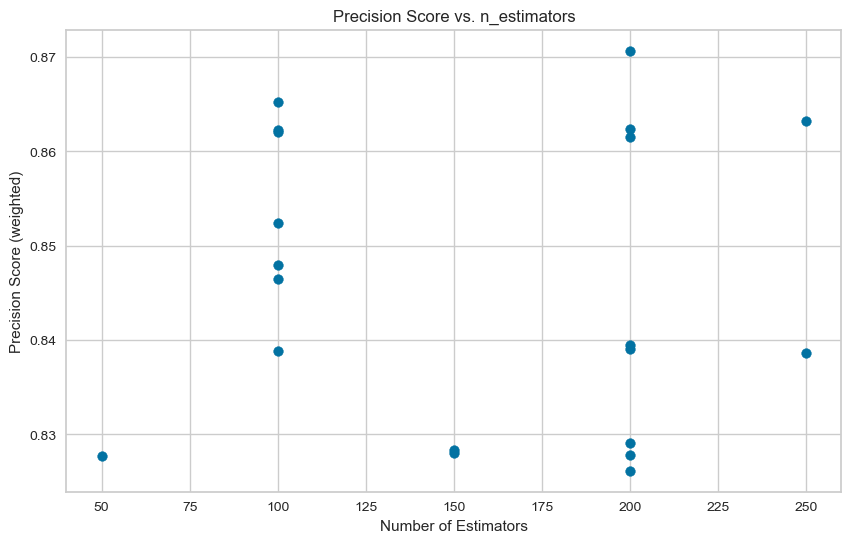

array([0.83865074, 0.82908617, 0.83945093, 0.82615509, 0.82805862,
       0.86230239, 0.82780997, 0.82839525, 0.84792429, 0.86240947,
       0.84644003, 0.85237262, 0.86206633, 0.83902736, 0.82772988,
       0.86323724, 0.86149844, 0.86523708, 0.83885316, 0.87068284])

In [60]:
# Extract relevant information from cv_results_
results = random_search.cv_results_
n_estimators_values = results['param_n_estimators'].data.astype(int)
precision_scores = results['mean_test_score']

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(n_estimators_values, precision_scores, marker='o', color='b')
plt.title('Precision Score vs. n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Precision Score (weighted)')
plt.grid(True)
plt.show()

results['mean_test_score']

In [38]:
# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Predict on training set
y_train_pred = random_search.predict(X_train)

# Evaluate performance
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# PRECISION
# train_precision = precision_score()

# Extract precision scores from cv_results_
precision_scores = random_search.cv_results_['mean_test_score']

# Display or use the precision scores as needed
print("Precision Scores:", precision_scores)

#??
precision_score = precision_score(y_train, y_train_pred, average = 'weighted', zero_division = 0)
print('Precision score:', precision_score)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}
Training Accuracy: 0.9542457201385163
Precision Scores: [0.83865074 0.82908617 0.83945093 0.82615509 0.82805862 0.86230239
 0.82780997 0.82839525 0.84792429 0.86240947 0.84644003 0.85237262
 0.86206633 0.83902736 0.82772988 0.86323724 0.86149844 0.86523708
 0.83885316 0.87068284]
Precision score: 0.9555698346630028


from 30 run:

Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Training Accuracy: 0.8914030898191919


from previous:

Best Hyperparameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
Validation Accuracy: 0.842227686582043

In [39]:
print(classification_report(y_train, y_train_pred))

                       precision    recall  f1-score   support

   Arabic (Romanized)       0.96      0.31      0.47       732
 Chinese (Characters)       1.00      1.00      1.00      7340
  Chinese (Romanized)       0.89      0.94      0.91      7335
              English       0.82      0.95      0.88     15944
               French       0.94      0.25      0.39       815
               German       0.98      0.08      0.15       745
           Indonesian       0.87      0.82      0.84      7862
              Italian       0.97      0.40      0.56       845
Japanese (Characters)       1.00      1.00      1.00     66433
 Japanese (Romanized)       0.95      0.99      0.97     64841
  Korean (Characters)       1.00      1.00      1.00      6518
   Korean (Romanized)       0.97      0.89      0.93      6860
                Malay       0.93      0.58      0.71      2033
           Portuguese       0.94      0.40      0.56       748
              Spanish       0.89      0.56      0.69  

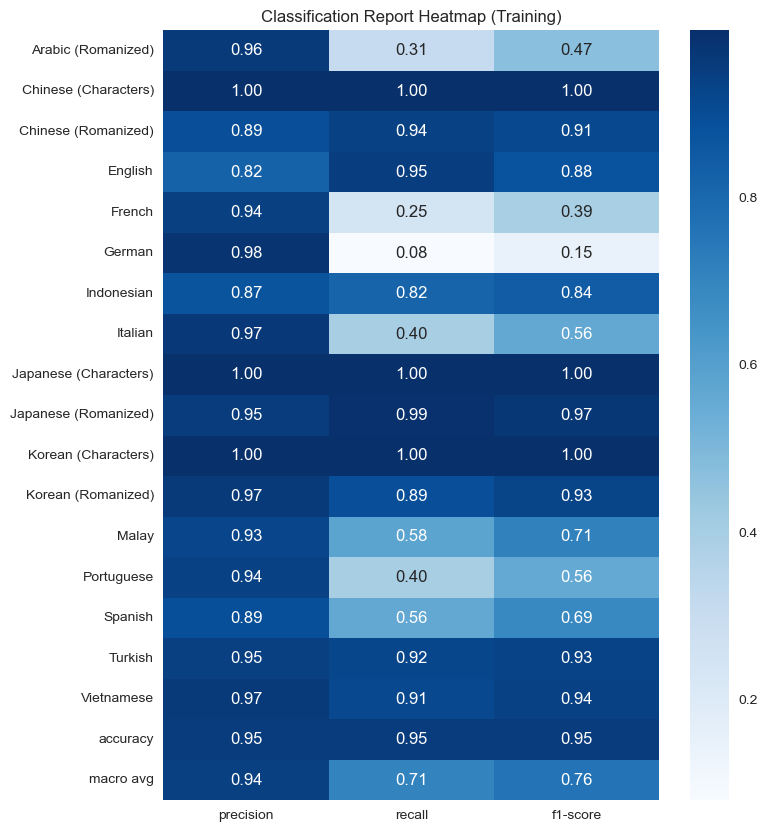

In [40]:
train_report = classification_report(y_train, y_train_pred, output_dict = True)

# Convert the classification report to a DataFrame for better visualization
train_report_df = pd.DataFrame(train_report).transpose()

# Plot the heatmap
plt.figure(figsize = (8, 10))
sns.heatmap(train_report_df.iloc[:-1, :-1], annot = True, cmap = 'Blues', fmt = '.2f')
plt.title('Classification Report Heatmap (Training)') 
plt.show()

In [ ]:
# from sklearn.inspection import permutation_importance

# result = permutation_importance(
#     random_search, X_test, y_test, n_repeats = 10, random_state = 3849, n_jobs = 1, scoring = make_scorer(metrics.precision_score, average = 'weighted', zero_division = 0)
# )

# forest_importances = pd.Series(result.importances_mean, index = X.columns)

In [ ]:
# forest_importances.sort_values(ascending = False)

30 run: train accuracy .891403

In [46]:
y_test_pred = random_search.predict(X_test)

# Evaluate performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

precision_score = metrics.precision_score(y_test, y_test_pred, average = 'weighted', zero_division = 0)
print('Test Precision score:', precision_score)

Test Accuracy: 0.8864003641743484
Test Precision score: 0.8793563228858146


30 run: test accu 0.81718

In [47]:
print(classification_report(y_test, y_test_pred))

                       precision    recall  f1-score   support

   Arabic (Romanized)       0.67      0.06      0.12       314
 Chinese (Characters)       0.99      0.99      0.99      3146
  Chinese (Romanized)       0.76      0.81      0.78      3143
              English       0.66      0.84      0.74      6833
               French       0.48      0.04      0.07       349
               German       1.00      0.00      0.01       319
           Indonesian       0.54      0.35      0.43      3369
              Italian       0.52      0.03      0.06       362
Japanese (Characters)       1.00      1.00      1.00     28472
 Japanese (Romanized)       0.88      0.97      0.92     27789
  Korean (Characters)       0.99      0.99      0.99      2793
   Korean (Romanized)       0.96      0.79      0.87      2940
                Malay       0.52      0.24      0.33       872
           Portuguese       0.48      0.07      0.12       320
              Spanish       0.62      0.24      0.35  

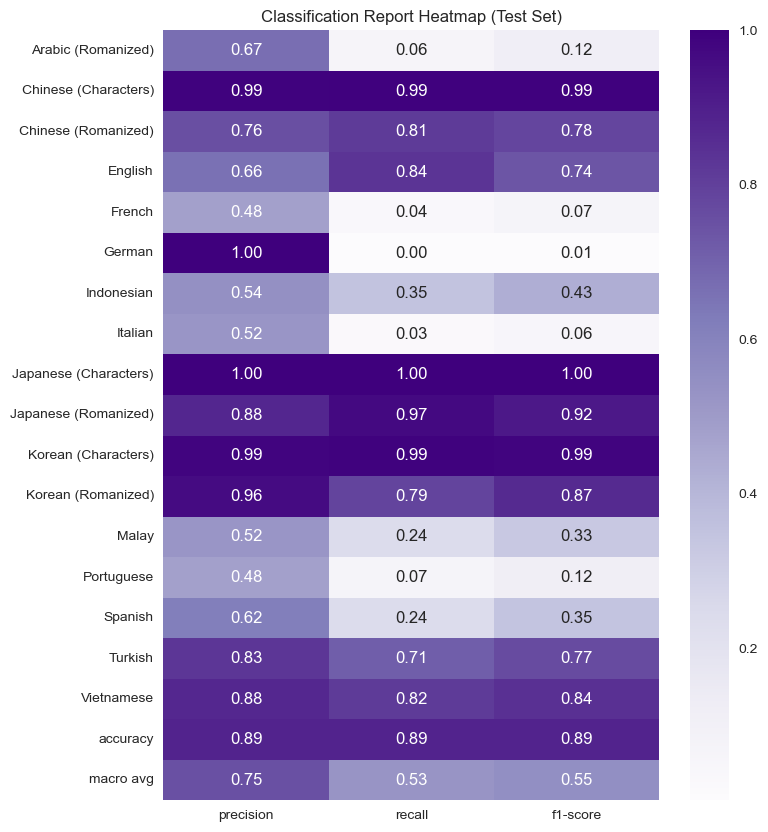

In [48]:
#test_report = classification_report(y_test, y_test_pred, target_names = y.unique(), output_dict = True)
test_report = classification_report(y_test, y_test_pred, output_dict = True)

# Convert the classification report to a DataFrame for better visualization
test_report_df = pd.DataFrame(test_report).transpose()

# Plot the heatmap
plt.figure(figsize = (8, 10))
sns.heatmap(test_report_df.iloc[:-1, :-1], annot = True, cmap = 'Purples', fmt = '.2f')
plt.title('Classification Report Heatmap (Test Set)')
plt.show()

In [ ]:
# languages = y.unique()
# report = classification_report(y_test, y_test_pred, target_names = languages, output_dict = True)
# print(report)
# print(report['Indonesian'])
# df_report = pd.DataFrame(report).transpose()
# print(df_report)

# # Create a grouped bar plot using matplotlib
# metrics = df_report.index
# print(metrics)
# width = 0.2  # Width of the bars

# fig, ax = plt.subplots(figsize = (20, 6))

# for i, lang in enumerate(languages):
#     positions = np.arange(len(metrics)) + i * width
#     ax.bar(positions, report[lang]['precision'], width, label = lang)

# # Update plot labels and legend
# ax.set_xticks(np.arange(len(metrics)) + width)
# ax.set_xticklabels(metrics)
# plt.xticks(rotation = 45)
# ax.set_xlabel('Metrics')
# ax.set_ylabel('Score')
# ax.set_title('Classification Report')
# ax.legend(title = 'Class')

### Random Forest: GridSearchCV

Best Hyperparameters: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
Training Accuracy: 0.8776304888152444

from 30 run:

Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Training Accuracy: 0.8914030898191919


from previous:

Best Hyperparameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
Validation Accuracy: 0.842227686582043

In [87]:
df[df['language'] == 'Vietnamese']['edit_distance'].value_counts()

edit_distance
0    729
3    602
2    485
4    207
1    194
5     59
6     11
7      1
8      1
Name: count, dtype: int64

In [89]:
edit_distance('từ hoàng thông', unidecode('từ hoàng thông'))

3

In [49]:
rf_param_grid = {
    'n_estimators': [100, 125, 150, 175, 200, 225],
    'max_depth': [None, 16, 18, 20],
    'min_samples_split': [12, 15],
    'min_samples_leaf': [2, 4],
    'bootstrap': [False]
}

rf_model2 = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_model2, param_grid = rf_param_grid, scoring = make_scorer(metrics.precision_score, average = 'weighted', zero_division = 0), cv = 3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'max_depth': [None, 16, 18, 20],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [12, 15],
                         'n_estimators': [100, 125, 150, 175, 200, 225]},
             scoring=make_scorer(precision_score, average=weighted, zero_division=0))

In [50]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 200}


IndexError: index 4 is out of bounds for axis 0 with size 4

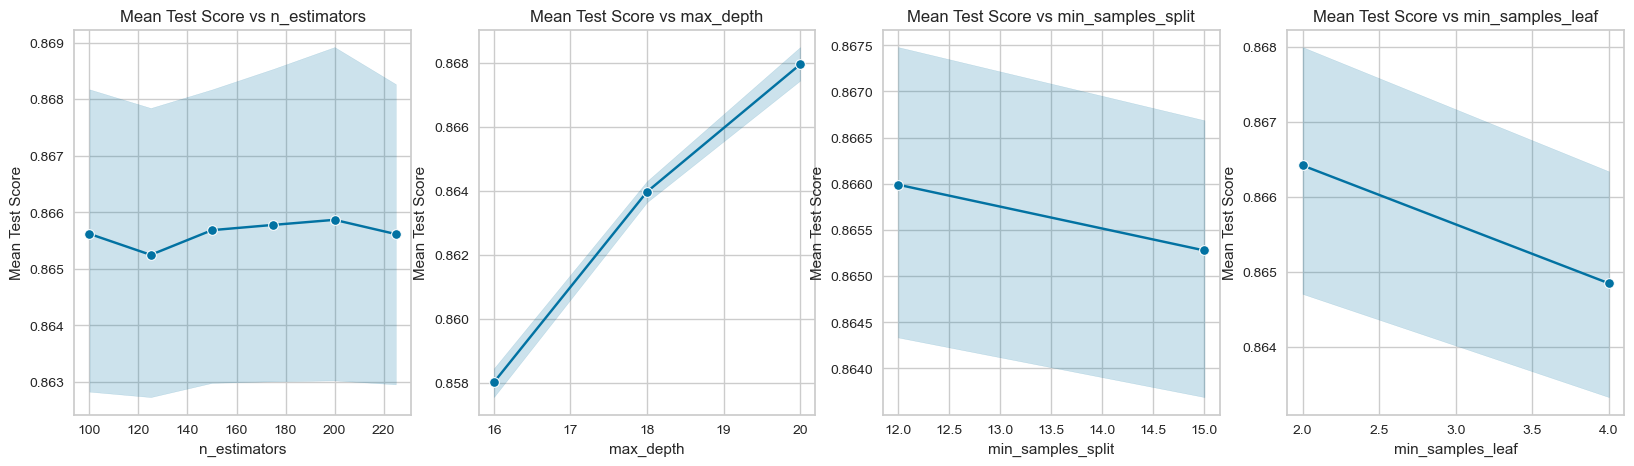

In [63]:
results2 = grid_search.cv_results_

# Plotting
fig2, axes2 = plt.subplots(1, 4, figsize = (20, 5))

# Plot hyperparameter vs mean test score
for i, (param, values) in enumerate(rf_param_grid.items()):
    x = np.array(results2[f'param_{param}'].data, dtype = float)
    y = results2['mean_test_score']
    sns.lineplot(x = x, y = y, ax = axes2[i], marker = 'o')
    axes2[i].set_title(f'Mean Test Score vs {param}')
    axes2[i].set_xlabel(param)
    axes2[i].set_ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

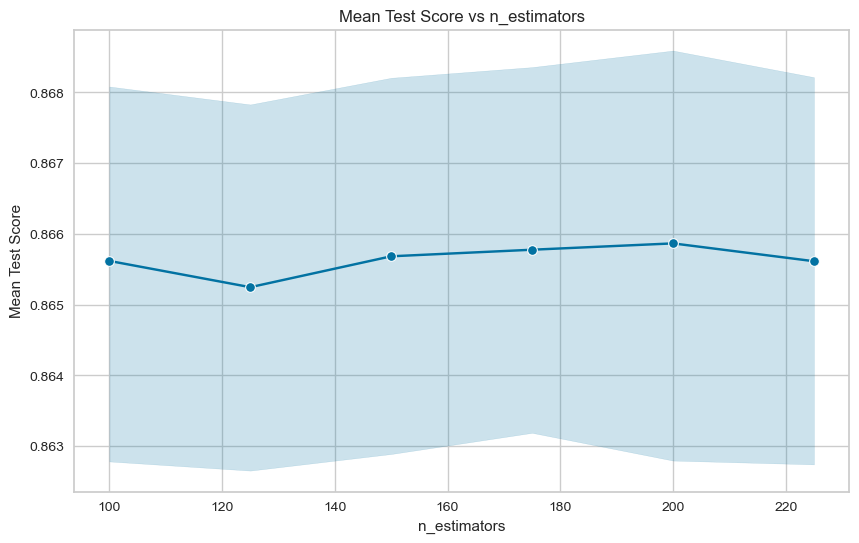

In [73]:
# Plot n_estimators vs mean test score
plt.figure(figsize = (10, 6))
sns.lineplot(x = results2['param_n_estimators'], y = results2['mean_test_score'], marker = 'o')
plt.title('Mean Test Score vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.show()

In [ ]:
y_train_pred2 = best_model.predict(X_train)

# Evaluate performance
train_accuracy2 = accuracy_score(y_train, y_train_pred2)
print("Training Accuracy:", train_accuracy2)

In [ ]:
# Predict on the test set
y_test_pred2 = best_model.predict(X_test)

# Evaluate performance on the test set
test_accuracy2 = accuracy_score(y_test, y_test_pred2)
print("Test Accuracy:", test_accuracy2)

In [ ]:
print(classification_report(y_train, y_train_pred2))

In [ ]:
train_report2 = classification_report(y_train, y_train_pred2, output_dict = True)

# Convert the classification report to a DataFrame for better visualization
train_report_df2 = pd.DataFrame(train_report2).transpose()

# Plot the heatmap
plt.figure(figsize = (8, 10))
sns.heatmap(train_report_df2.iloc[:-1, :-1], annot = True, cmap = 'Blues', fmt = '.2f')
plt.title('Classification Report Heatmap (Training)') 
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred2))

In [ ]:
#test_report = classification_report(y_test, y_test_pred, target_names = y.unique(), output_dict = True)
test_report2 = classification_report(y_test, y_test_pred2, output_dict = True)

# Convert the classification report to a DataFrame for better visualization
test_report_df2 = pd.DataFrame(test_report2).transpose()

# Plot the heatmap
plt.figure(figsize = (8, 10))
sns.heatmap(test_report_df2.iloc[:-1, :-1], annot = True, cmap = 'Blues', fmt = '.2f')
plt.title('Classification Report Heatmap (Test Set)')
plt.show()

### Naive Bayes

In [ ]:
# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

In [ ]:
# Make predictions on the testing data
#y_pred = nb_classifier.predict(X_test)
y_pred = nb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
nb_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", nb_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

### Logistic Regression

In [ ]:
X = df.drop(columns = 'language', axis = 1)
y = df['language']

# Split data for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
lr_model = LogisticRegression()

# Define the hyperparameter search space
param_dist = {
    'C': loguniform(1e-3, 1e3),
    'penalty': ['l1', 'l2'],
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(lr_model, param_distributions=param_dist, n_iter = 10, scoring='accuracy', cv = 5, random_state = 42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters
best_params = random_search.best_params_

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)

# Print the results
print("Best Hyperparameters:", best_params)
print("Test Accuracy of Best Model:", accuracy)

In [ ]:
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

### Gradient Boosting

In [ ]:
# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(gb_classifier, param_distributions = param_dist, n_iter = 10, scoring='accuracy', cv = 5, random_state = 42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters
best_params = random_search.best_params_

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)

# Print the results
print("Best Hyperparameters:", best_params)
print("Test Accuracy of Best Model:", accuracy)

In [ ]:
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))